In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
spamd= pd.read_csv("spam.csv", encoding='latin-1')
spamd = spamd.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spamd = spamd.rename(columns={"v1": "label", "v2": "text"})

In [56]:
spamd.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
spamd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [58]:
spamd['label'] = spamd['label'].map({'ham': 0, 'spam': 1})
X = spamd['text']
y = spamd['label']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [63]:
print("Accuracy:", accuracy)

Accuracy: 0.97847533632287


In [64]:
print("Confusion Matrix:", conf_matrix)

Confusion Matrix: [[965   0]
 [ 24 126]]


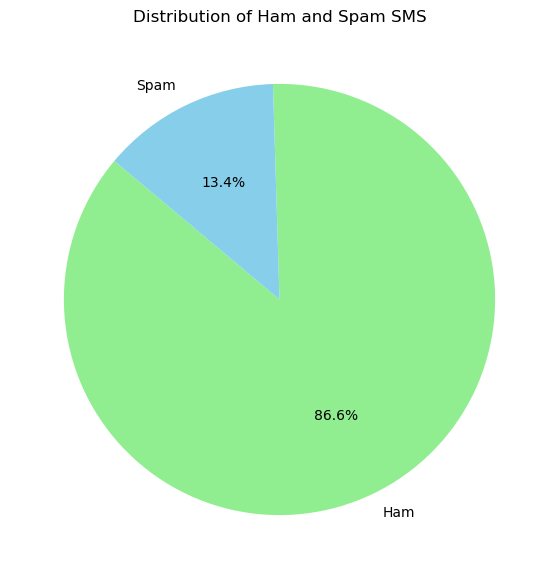

In [65]:
labels = ['Ham', 'Spam']
sizes = [len(spamd[spamd['label'] == 0]), len(spamd[spamd['label'] == 1])]
colors = ['lightgreen', 'skyblue']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ham and Spam SMS')
plt.show()

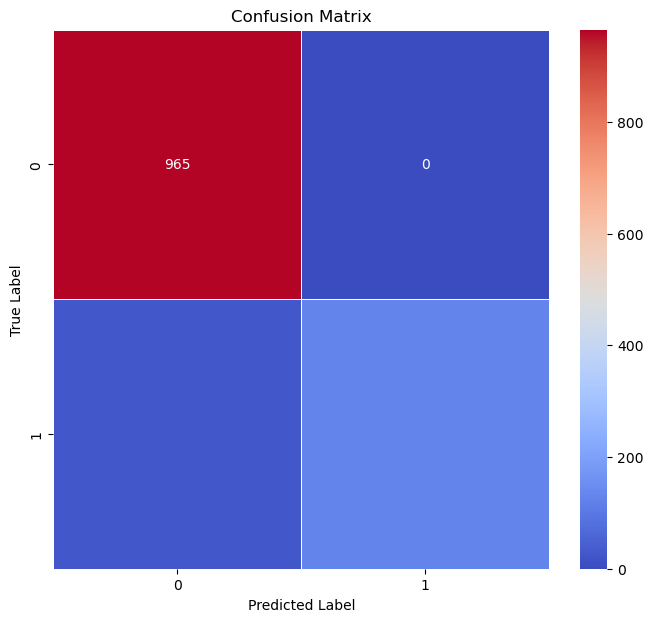

In [66]:
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

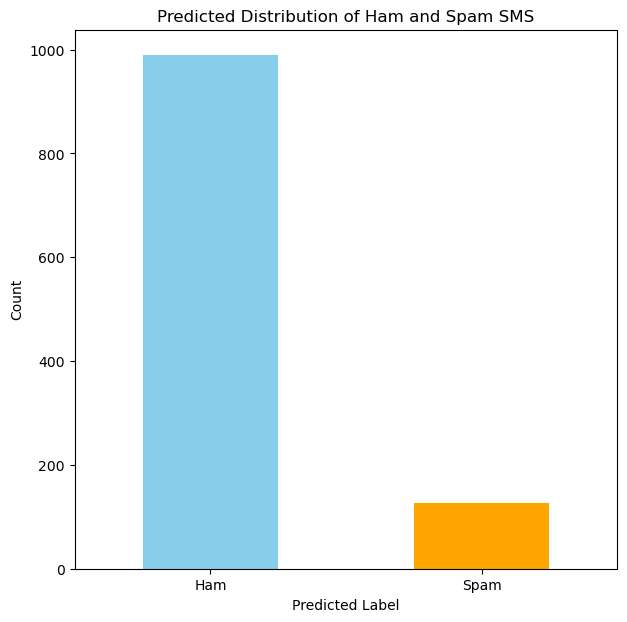

In [67]:
predicted_labels = ['Ham' if label == 0 else 'Spam' for label in y_pred]
predicted_labels_counts = pd.Series(predicted_labels).value_counts()

plt.figure(figsize=(7, 7))
predicted_labels_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Predicted Distribution of Ham and Spam SMS')
plt.xticks(rotation=0)
plt.show()

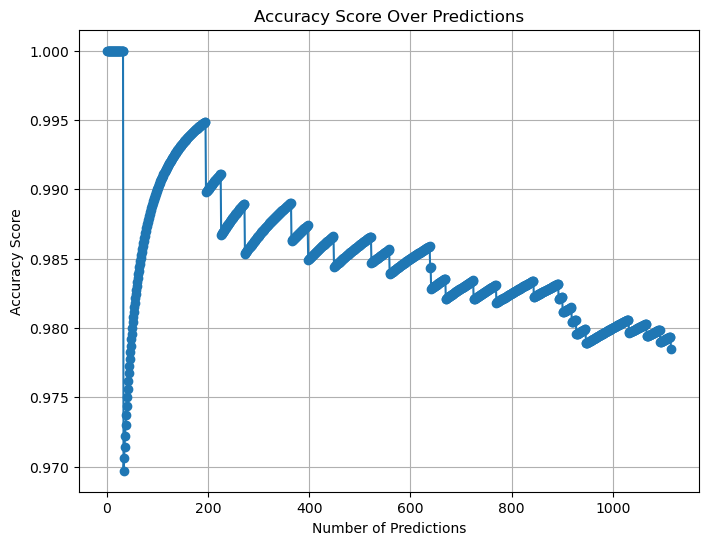

In [68]:
accuracy_scores = [accuracy_score(y_test[:i+1], y_pred[:i+1]) for i in range(len(y_pred))]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Number of Predictions')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Over Predictions')
plt.grid(True)
plt.show()